## Estadística Aplicada

1er parcial

Oscar Gabriel Martínez Rodríguez 1962702

Grupo 43

### Cargar librerías necesarias para ejecutar el parcial

In [103]:
# librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Problema 1

In [104]:
#cargar base de datos
datos1 = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/peliculas.csv')
datos1.head()

,title,description,release_year,rental_rate,length,rating,special_features,category
0,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,0.99,86,PG,"Deleted Scenes,Behind the Scenes",Documentary
1,Ace Goldfinger,A Astounding Epistle of a Database Administrat...,2006,4.99,48,G,"Trailers,Deleted Scenes",Horror
2,Adaptation Holes,A Astounding Reflection of a Lumberjack And a ...,2006,2.99,50,NC-17,"Trailers,Deleted Scenes",Documentary
3,Affair Prejudice,A Fanciful Documentary of a Frisbee And a Lumb...,2006,2.99,117,G,"Commentaries,Behind the Scenes",Horror
4,African Egg,A Fast-Paced Documentary of a Pastry Chef And ...,2006,2.99,130,G,Deleted Scenes,Family


In [105]:
#cuántas películas hay
print(f'En la base de datos hay {len(datos1)} películas')

En la base de datos hay 1000 películas


In [106]:
#primero asegurarse que cada película tenga su género, para poder contar los géneros
generos = datos1.groupby('category')['title'].count()
print(generos.sum())

997


In [107]:
#dado que la suma da 997 esto indica que hay 3 películas sin género, hay que llenar los huecos vacíos
datos1['category'] = datos1['category'].fillna("Sin género")
generos = pd.DataFrame(datos1.groupby('category')['title'].count())
print(generos.sum())

title    1000
dtype: int64


In [108]:
#un vistazo al dataframe de géneros
generos

,title
category,
Action,64
Animation,66
Children,60
Classics,57
Comedy,58
Documentary,68
Drama,61
Family,69
Foreign,73


Dado que se creó "Sin género", se considera que hay len(generos)-1 géneros en la base de datos

In [130]:
#le resto uno al valor de len(generos) pues un género es "sin género"
print(f'Existen {len(generos)} géneros en la base de datos, donde uno es "Sin género", por lo que, sin contar este, hay {len(generos)-1} géneros en total')

Existen 17 géneros en la base de datos, donde uno es "Sin género", por lo que, sin contar este, hay 16 géneros en total


In [110]:
#cuánto duran en promedio las películas
duracion_promedio = datos1['length'].mean().round(2)
print(f'Las películas duran en promedio {duracion_promedio} minutos o {(duracion_promedio/60).round(2)} horas')

Las películas duran en promedio 115.27 minutos o 1.92 horas


In [111]:
#dataframe peliculas_dormir para duracion >2 horas y documentales
peliculas_dormir = datos1[datos1['length'] > 120][datos1['category'] == "Documentary"]
peliculas_dormir = peliculas_dormir.reset_index()
peliculas_dormir.head()

C:\Users\oscar\AppData\Local\Temp\ipykernel_27564\478048600.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  peliculas_dormir = datos1[datos1['length'] > 120][datos1['category'] == "Documentary"]


,index,title,description,release_year,rental_rate,length,rating,special_features,category
0,39,Army Flintstones,A Boring Saga of a Database Administrator And ...,2006,0.99,148,R,"Trailers,Commentaries",Documentary
1,57,Beach Heartbreakers,A Fateful Display of a Womanizer And a Mad Sci...,2006,2.99,122,G,"Deleted Scenes,Behind the Scenes",Documentary
2,128,Cause Date,A Taut Tale of a Explorer And a Pastry Chef wh...,2006,2.99,179,R,"Commentaries,Deleted Scenes,Behind the Scenes",Documentary
3,141,Chicken Hellfighters,A Emotional Drama of a Dog And a Explorer who ...,2006,0.99,122,PG,"Trailers,Commentaries,Deleted Scenes,Behind th...",Documentary
4,155,Clerks Angels,A Thrilling Display of a Sumo Wrestler And a G...,2006,4.99,164,G,Commentaries,Documentary


In [112]:
#cuantas peliculas de cada género existen

#esto ya lo habia hecho para contar cuántos géneros hay, pondré de nuevo la instrucción
generos = datos1.groupby('category')['title'].count()
generos1 = pd.DataFrame(generos)
generos1

,title
category,
Action,64
Animation,66
Children,60
Classics,57
Comedy,58
Documentary,68
Drama,61
Family,69
Foreign,73


In [113]:
#duracion promedio de las peliculas de cada género
generos2 = datos1.groupby('category')['length'].agg(['count', 'mean']).round(2)
generos2

,count,mean
category,,
Action,64,111.61
Animation,66,111.02
Children,60,109.80
Classics,57,111.67
Comedy,58,115.83
Documentary,68,108.75
Drama,61,119.89
Family,69,114.78
Foreign,73,121.70


In [114]:
#nueva columna que indique si la película es "Corta", "Normal" o "Larga"
datos1['duracion'] = np.where(datos1['length'] < 90, "Corta", np.where(datos1['length'] < 150, "Normal", "Larga"))
datos1.head(10)

,title,description,release_year,rental_rate,length,rating,special_features,category,duracion
0,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,0.99,86,PG,"Deleted Scenes,Behind the Scenes",Documentary,Corta
1,Ace Goldfinger,A Astounding Epistle of a Database Administrat...,2006,4.99,48,G,"Trailers,Deleted Scenes",Horror,Corta
2,Adaptation Holes,A Astounding Reflection of a Lumberjack And a ...,2006,2.99,50,NC-17,"Trailers,Deleted Scenes",Documentary,Corta
3,Affair Prejudice,A Fanciful Documentary of a Frisbee And a Lumb...,2006,2.99,117,G,"Commentaries,Behind the Scenes",Horror,Normal
4,African Egg,A Fast-Paced Documentary of a Pastry Chef And ...,2006,2.99,130,G,Deleted Scenes,Family,Normal
5,Agent Truman,A Intrepid Panorama of a Robot And a Boy who m...,2006,2.99,169,PG,Deleted Scenes,Foreign,Larga
6,Airplane Sierra,A Touching Saga of a Hunter And a Butler who m...,2006,4.99,62,PG-13,"Trailers,Deleted Scenes",Comedy,Corta
7,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,4.99,54,R,Trailers,Horror,Corta
8,Alabama Devil,A Thoughtful Panorama of a Database Administra...,2006,2.99,114,PG-13,"Trailers,Deleted Scenes",Horror,Normal
9,Aladdin Calendar,A Action-Packed Tale of a Man And a Lumberjack...,2006,4.99,63,NC-17,"Trailers,Deleted Scenes",Sports,Corta


#### Problema 2

In [115]:
datos2 = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/poblacion_Asgard.csv')

In [116]:
#ordenar alfabeticamente por estado y municipio
datos2 = datos2.sort_values(['Estado', 'Municipio'])
datos2 = datos2.reset_index()
datos2.head(10)

,index,País,Estado,Municipio,Población
0,16,Asgard,Alderaan,Ciudad Jedi,130312
1,1,Asgard,Alderaan,Fuente Dorada,49984
2,31,Asgard,Alderaan,Luz azul,914910
3,76,Asgard,Alderaan,Madero,774290
4,46,Asgard,Alderaan,San Isidro,159338
5,61,Asgard,Alderaan,The Upside Down,254618
6,13,Asgard,Atlantis,Luz verde,689519
7,73,Asgard,Atlantis,Madero,728270
8,88,Asgard,Atlantis,Mar amarillo,961061
9,58,Asgard,Atlantis,Playa Rosa,123409


In [117]:
#cuántos estados hay
estados = datos2.groupby('Estado')['Municipio'].count()
print(f'Hay {len(estados)} estados')

Hay 15 estados


In [118]:
#cuantos municipios hay en cada estado
estados = pd.DataFrame(datos2.groupby('Estado')['Municipio'].count())
estados

,Municipio
Estado,
Alderaan,6
Atlantis,6
Endor,6
Genosha,6
Gotham,6
Mandalore,6
Mordor,6
Mustafar,6
Naboo,6


In [119]:
#cuántos municipios hay en total
municipios = estados['Municipio'].sum()

print(f'Hay {municipios} municipios en total')

Hay 90 municipios en total


In [120]:
#cuánta población tiene el país en total
poblacion_total = datos2['Población'].sum()
print(f'Hay {poblacion_total} habitantes en total')

Hay 43114719 habitantes en total


In [121]:
#cuánta población tiene cada estado
poblacion_estado = pd.DataFrame(datos2.groupby('Estado')['Población'].sum())
poblacion_estado

,Población
Estado,
Alderaan,2283452
Atlantis,3779656
Endor,2427956
Genosha,2871584
Gotham,3204304
Mandalore,2044164
Mordor,3627119
Mustafar,2183880
Naboo,1602111


In [122]:
#clasificar segun la mediana
mediana = datos2['Población'].median()
datos2['Poblados'] = np.where(datos2['Población'] > mediana, 'Muy poblados', 'Poco poblados')
datos2.head(10)

,index,País,Estado,Municipio,Población,Poblados
0,16,Asgard,Alderaan,Ciudad Jedi,130312,Poco poblados
1,1,Asgard,Alderaan,Fuente Dorada,49984,Poco poblados
2,31,Asgard,Alderaan,Luz azul,914910,Muy poblados
3,76,Asgard,Alderaan,Madero,774290,Muy poblados
4,46,Asgard,Alderaan,San Isidro,159338,Poco poblados
5,61,Asgard,Alderaan,The Upside Down,254618,Poco poblados
6,13,Asgard,Atlantis,Luz verde,689519,Muy poblados
7,73,Asgard,Atlantis,Madero,728270,Muy poblados
8,88,Asgard,Atlantis,Mar amarillo,961061,Muy poblados
9,58,Asgard,Atlantis,Playa Rosa,123409,Poco poblados


In [123]:
#5 municipios mas poblados
datos2 = datos2.sort_values('Población', ascending= False)
datos2.head()

,index,País,Estado,Municipio,Población,Poblados
37,34,Asgard,Mordor,Madripur,998079,Muy poblados
47,27,Asgard,Mustafar,Villa Norte,997107,Muy poblados
67,6,Asgard,Sokovia,La Unión,986067,Muy poblados
55,74,Asgard,Narnia,Gral Escobedo,974548,Muy poblados
41,79,Asgard,Mordor,Yellow town,974324,Muy poblados


In [124]:
#5 municipios menos poblados
datos2.tail()

,index,País,Estado,Municipio,Población,Poblados
24,85,Asgard,Gotham,Mar violeta,44585,Poco poblados
34,26,Asgard,Mandalore,Shelbyville,31535,Poco poblados
16,39,Asgard,Endor,Villa rosa,25538,Poco poblados
56,14,Asgard,Narnia,Luz roja,14986,Poco poblados
18,17,Asgard,Genosha,Ciudad Jedi,13666,Poco poblados


In [125]:
#el municipio mas poblado de cada estado
datos2t = datos2.sort_values('Población', ascending= False)
datos2t.drop_duplicates(subset= 'Estado', keep= 'first')

,index,País,Estado,Municipio,Población,Poblados
37,34,Asgard,Mordor,Madripur,998079,Muy poblados
47,27,Asgard,Mustafar,Villa Norte,997107,Muy poblados
67,6,Asgard,Sokovia,La Unión,986067,Muy poblados
55,74,Asgard,Narnia,Gral Escobedo,974548,Muy poblados
64,60,Asgard,Pandora,Villa Demogorgon,969140,Muy poblados
8,88,Asgard,Atlantis,Mar amarillo,961061,Muy poblados
77,50,Asgard,Tatooine,Villa Marlon,925414,Muy poblados
25,55,Asgard,Gotham,Playa Verde,918710,Muy poblados
2,31,Asgard,Alderaan,Luz azul,914910,Muy poblados
79,82,Asgard,Wakanda,Redgreen,880858,Muy poblados


#### Problema 3

In [126]:
#15 municipios mas poblados de Asgard
asgard15 = datos2.sort_values('Población', ascending= False).head(15)
asgard15

,index,País,Estado,Municipio,Población,Poblados
37,34,Asgard,Mordor,Madripur,998079,Muy poblados
47,27,Asgard,Mustafar,Villa Norte,997107,Muy poblados
67,6,Asgard,Sokovia,La Unión,986067,Muy poblados
55,74,Asgard,Narnia,Gral Escobedo,974548,Muy poblados
41,79,Asgard,Mordor,Yellow town,974324,Muy poblados
64,60,Asgard,Pandora,Villa Demogorgon,969140,Muy poblados
8,88,Asgard,Atlantis,Mar amarillo,961061,Muy poblados
77,50,Asgard,Tatooine,Villa Marlon,925414,Muy poblados
25,55,Asgard,Gotham,Playa Verde,918710,Muy poblados
2,31,Asgard,Alderaan,Luz azul,914910,Muy poblados


C:\Users\oscar\AppData\Local\Temp\ipykernel_27564\1422397749.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in valores])


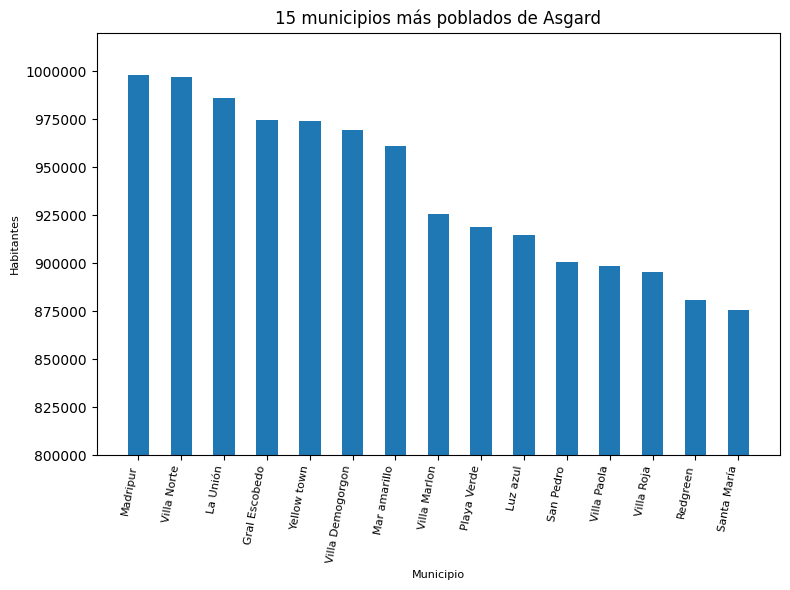

In [127]:
plt.figure(figsize=(8,6))
plt.bar(asgard15['Municipio'], asgard15['Población'], width=0.5, linewidth = 0)
plt.title('15 municipios más poblados de Asgard')
plt.xlabel('Municipio', fontsize = 8)
plt.ylabel('Habitantes', fontsize = 8)
plt.xticks(rotation= 80, ha = 'right', fontsize = 8)
plt.ylim(800000,1020000)

#para desactivar la notación científica
valores = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in valores])

plt.tight_layout()
plt.show()

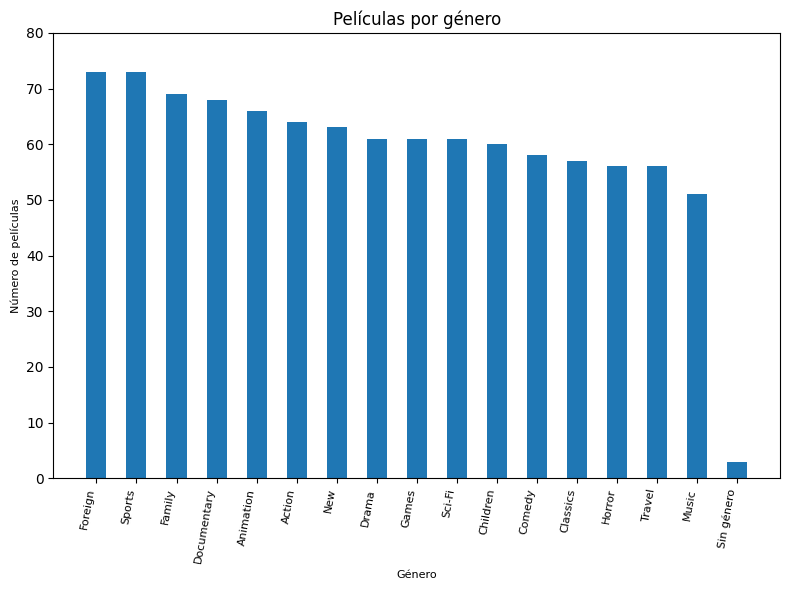

In [128]:
#cuántas películas hay de cada género
generos1 = generos1.sort_values('title',ascending= False)
generos3 = generos1.reset_index()

plt.figure(figsize=(8,6))
plt.bar(generos3['category'], generos3['title'], width=0.5, linewidth = 0)
plt.title('Películas por género')
plt.xlabel('Género', fontsize = 8)
plt.ylabel('Número de películas', fontsize = 8)
plt.xticks(rotation= 80, ha = 'right', fontsize = 8)
plt.ylim(0,80)

plt.tight_layout()
plt.show()
